In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn.datasets import make_regression

from sklearn import metrics
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [15]:
df = pd.read_json(r"data_harvest_clean.json", dtype={'code_postal': 'str'})
df.head()

,marque,modele,date_fabrication,kilometrage,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels,prix_vente
0,dacia,duster,2019,18300,4x4,86130,essence,0,0.0,manuelle,4,5,7,130,17600
1,mini,cooper,2018,47500,berline,59240,essence,119,0.0,automatique,2,4,10,192,24990
2,nissan,qashqai,2013,166400,break,53000,diesel,129,0.0,manuelle,4,5,6,110,8490
3,nissan,qashqai,2016,61500,4x4,1300,diesel,128,4.9,automatique,4,5,7,130,16900
4,mini,cooper,2018,58529,berline,30200,diesel,99,0.0,manuelle,4,5,5,95,17900


In [16]:
df.dtypes

marque               object
modele               object
date_fabrication      int64
kilometrage           int64
carrosserie          object
code_postal          object
energie              object
emission              int64
consommation        float64
transmission         object
portes                int64
sieges                int64
cv_fiscaux            int64
cv_reels              int64
prix_vente            int64
dtype: object

<AxesSubplot:>

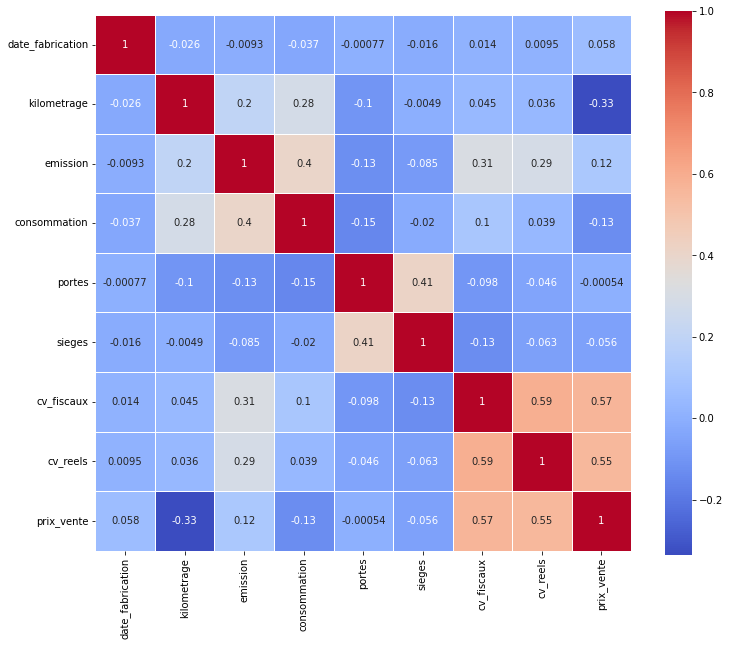

In [17]:
cor = df.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, 
            square = True, 
            cmap="coolwarm",
            linewidths=0.5,
            annot=True )

In [18]:
df['transmission'].value_counts(normalize=True)

manuelle            0.534016
automatique         0.412936
semi automatique    0.051745
autres              0.001303
Name: transmission, dtype: float64

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


cat_var = ['marque','modele','energie','transmission','code_postal']

categorielle_encoder = OneHotEncoder(handle_unknown='ignore')


#enc_df = pd.DataFrame(categorielle_encoder.transform(categorielle).toarray())
ct = ColumnTransformer(transformers=[("cat",categorielle_encoder,cat_var)])
enc_df = ct.fit_transform(X)
# pour le récupérer en pickel il faut l'entrainer 
# preprocessing = ColumnTransformer(
# [
#         ("cat", categorielle_encoder, categorielle)
#     ]
# )

# exemple pipeline 

#pipeline = Pipeline(steps=[("preproc", categorielle_encoder),("model",DecisionTreeRegressor())])

# pour récupérer le preprocessing 
# pipeline["preproc"]
# pour entrainer la pipeline 
# pipeline.fit(X,y)


In [20]:
enc_df

<10745x1540 sparse matrix of type '<class 'numpy.float64'>'
	with 53725 stored elements in Compressed Sparse Row format>

In [21]:
#X, y = df(n_samples=3000, n_features=9)
# print(X[0:2])
# print(y[0:2])


print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(enc_df, y, test_size=0.20, random_state=42)





(10745, 14) (10745,)


In [22]:
set_config(print_changed_only=False) 

# dtr = DecisionTreeRegressor()
# print(dtr)
from sklearn import linear_model
model = linear_model.LinearRegression()
classifier = model.fit(X_train, y_train)

In [30]:
score = classifier.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.7376143440462144


In [24]:
y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  97382451.34241338
RMSE:  9868.254726263069


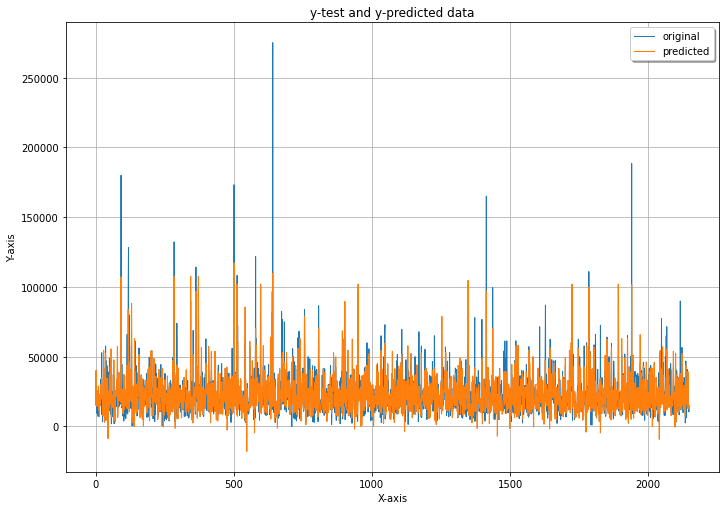

In [25]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 